In [63]:
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy.integrate import odeint

In [126]:
path = "test_img.jpg"
img = Image.open(path);
p = np.array(img)
p.shape

(256, 256)

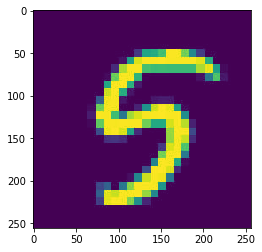

In [128]:
imgplot = plt.imshow(p)

# Logistic

In [129]:
def logistic(r, x):
    return r*x*(1-x)

n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5*np.ones(n)

for i in range(iterations):
    x = logistic(r, x)

In [130]:
x[986]

0.6223443430967084

# Lorenz

In [131]:
def lorenz(in_, t, sigma, b, r):
    x = in_[0]
    y = in_[1]
    z = in_[2]
    
    return [sigma*(y-x), r*x - y - x*z, x*y - b*z]

In [132]:
from scipy.integrate import odeint

def get_solution(in_0, tmax, nt, args_tuple):
    t = np.linspace(0, tmax, nt)
    soln = odeint(lorenz, in_0, t, args=args_tuple).T
    return t, soln

In [133]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

in_0 = [5.0, 5.0, 5.0]
t_max = 20
t_steps = 30000
t, [solx, soly, solz] = get_solution(in_0, t_max, t_steps, 
                                            (10.0, 8/3, 28))

In [197]:
def encrypt(img, key, itera):
    
    def logistic(r, x):
        return r*x*(1-x)

    n = 10000
    r = np.linspace(2.5, 4.0, n)
    iterations = 1000
    last = 100
    x = 1e-5*np.ones(n)

    for i in range(iterations):
        x = logistic(r, x)
        
        
    key.append(key[0]*key[1])
    def lorenz(in_, t, sigma, b, r):
        x = in_[0]
        y = in_[1]
        z = in_[2]
    
        return [sigma*(y-x), r*x - y - x*z, x*y - b*z]

    def get_solution(in_0, tmax, nt, args_tuple):
        t = np.linspace(0, tmax, nt)
        soln = odeint(lorenz, in_0, t, args=args_tuple).T
        return t, soln
    
    in_0 = key
    t_max = 20
    t_steps = 50000000
    t, [solx, soly, solz] = get_solution(in_0, t_max, t_steps, 
                                                (10.0, 8/3, 28))

    print(img.shape[1])
    tm = np.zeros((img.shape[1], img.shape[1]))
    
    
    for i in range(img.shape[1]):
        for j in range(img.shape[1]):
            if(i%3 == 0):
                tm[i][j] = int(max(solx[itera], -1*solx[itera])*100)
            elif(i%3 == 1):
                tm[i][j] = int(max(soly[itera], -1*soly[itera])*100)
            elif(i%3 == 2):
                tm[i][j] = int(max(solz[itera], -1*solz[itera])*100)
            itera += 150   
   
    temp = int(key[0]*key[2]*87435)
    temp = temp%1000
    log_key = x[temp]
    print("temp = ", temp)
    tm = tm*log_key

    tm = tm%256
    
    print(tm)
    
    encrypt_img = np.matmul(img, tm)
    encrypt_img = np.transpose(encrypt_img)
    return encrypt_img

In [196]:
def decrypt(e_img, key, itera):
    
    def logistic(r, x):
        return r*x*(1-x)

    n = 10000
    r = np.linspace(2.5, 4.0, n)
    iterations = 1000
    last = 100
    x = 1e-5*np.ones(n)

    for i in range(iterations):
        x = logistic(r, x)
        
    
    e_img = np.transpose(e_img)
    key.append(key[0]*key[1])
    def lorenz(in_, t, sigma, b, r):
        x = in_[0]
        y = in_[1]
        z = in_[2]
    
        return [sigma*(y-x), r*x - y - x*z, x*y - b*z]

    def get_solution(in_0, tmax, nt, args_tuple):
        t = np.linspace(0, tmax, nt)
        soln = odeint(lorenz, in_0, t, args=args_tuple).T
        return t, soln
    
    in_0 = key
    t_max = 20
    t_steps = 50000000
    t, [solx, soly, solz] = get_solution(in_0, t_max, t_steps, 
                                                (10.0, 8/3, 28))
    
    tm = np.zeros((e_img.shape[1], e_img.shape[1]))
    
    
    for i in range(e_img.shape[1]):
        for j in range(e_img.shape[1]):
            if(i%3 == 0):
                tm[i][j] = int(max(solx[itera], -1*solx[itera])*100)
            elif(i%3 == 1):
                tm[i][j] = int(max(soly[itera], -1*soly[itera])*100)
            elif(i%3 == 2):
                tm[i][j] = int(max(solz[itera], -1*solz[itera])*100)
            itera += 150  
            
    temp = int(key[0]*key[2]*87435)
    temp = temp%1000
    log_key = x[temp]
    print("temp = ", temp)
    tm = tm*log_key
    tm = tm%256
    
    print(tm)
    print(np.linalg.det(tm))
    tm_inv = np.linalg.pinv(tm)
    decrypt_img = np.matmul(e_img, tm_inv)
    return decrypt_img

In [189]:
p.shape

(256, 256)

256
temp =  320
[[186.5135708  187.12110686 187.12110686 ... 229.64863115 229.64863115
  229.64863115]
 [236.71174566 236.71174566 236.71174566 ... 247.0398587  247.64739476
  247.64739476]
 [114.90279659 114.90279659 114.29526052 ...  94.85410656  94.85410656
   94.85410656]
 ...
 [  7.06311451   7.06311451   7.06311451 ...  31.36455696  31.97209302
   31.97209302]
 [161.91039152 161.30285546 161.30285546 ... 132.14112452 132.14112452
  132.14112452]
 [243.01442449 243.01442449 243.01442449 ... 255.16514572 255.16514572
  255.16514572]]


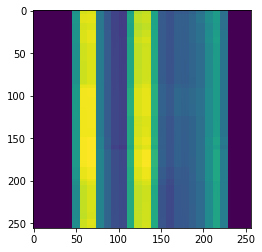

In [198]:
e_img = encrypt(p, [3.0, 8.0], 4000)
imgplot = plt.imshow(e_img)

temp =  320
[[186.5135708  187.12110686 187.12110686 ... 229.64863115 229.64863115
  229.64863115]
 [236.71174566 236.71174566 236.71174566 ... 247.0398587  247.64739476
  247.64739476]
 [114.90279659 114.90279659 114.29526052 ...  94.85410656  94.85410656
   94.85410656]
 ...
 [  7.06311451   7.06311451   7.06311451 ...  31.36455696  31.97209302
   31.97209302]
 [161.91039152 161.30285546 161.30285546 ... 132.14112452 132.14112452
  132.14112452]
 [243.01442449 243.01442449 243.01442449 ... 255.16514572 255.16514572
  255.16514572]]
-3.291609609565425e+135


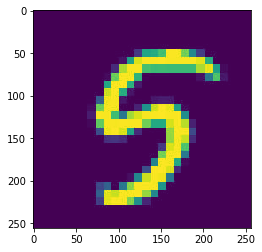

In [200]:
d_img = decrypt(e_img, [3.0, 8.0], 4000)
imgplot = plt.imshow(d_img)